In [115]:
import pandas as pd

In [116]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [117]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [118]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [119]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [120]:
df.shape

(200000, 9)

In [121]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
df = df[df['fare_amount'] > 0]
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [122]:
import math
def distance(lat1, long1, lat2, long2):
    dlat = lat2 - lat1
    dlong = long2 - long1
    return math.sqrt(dlat** 2 + dlong**2)

df['distance'] = df.apply(
    lambda row: distance(
        lat1=row['pickup_latitude'],
        long1=row['pickup_longitude'],
        lat2=row['dropoff_latitude'],
        long2=row['dropoff_longitude']
    ), axis=1
)


In [123]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [124]:
def normalize(feature):
    global df
    maxi = df[feature].max()
    mini = df[feature].min()
    df[feature] = (df[feature] - mini)/(maxi - mini)

normalize("distance")

In [125]:
import seaborn as sns

<Axes: xlabel='distance'>

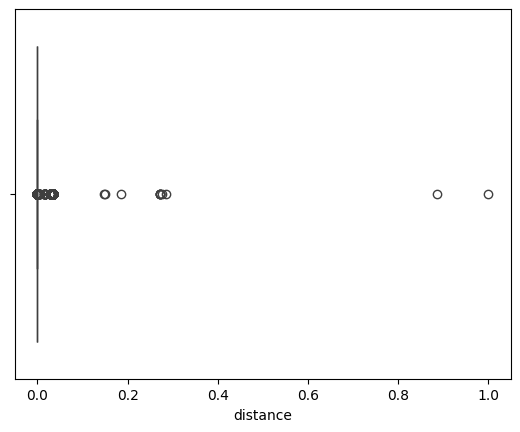

In [126]:
sns.boxplot(data=df, x="distance")

In [127]:
def remove_outliers(feature):
    global df
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lb) & (df[feature] <= ub)]

remove_outliers("distance")

In [128]:
normalize("distance")
df.describe()

,fare_amount,passenger_count,distance
count,182638.000000,182638.000000,182638.000000
mean,9.234490,1.682405,0.308462
std,5.827178,1.391952,0.213533
min,0.010000,0.000000,0.000000
25%,5.700000,1.000000,0.152371
50%,8.000000,1.000000,0.254729
75%,11.300000,2.000000,0.416140
max,499.000000,208.000000,1.000000


<Axes: xlabel='distance'>

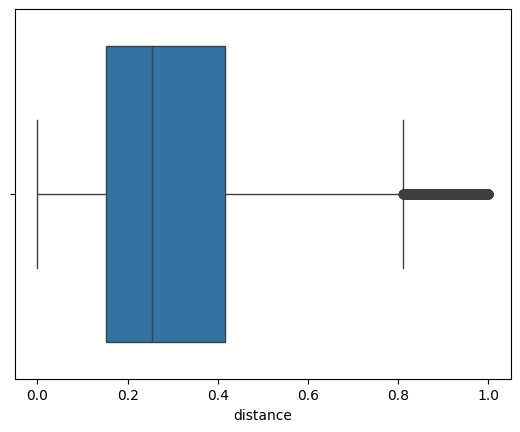

In [129]:
sns.boxplot(data=df, x="distance")

<Axes: xlabel='distance', ylabel='fare_amount'>

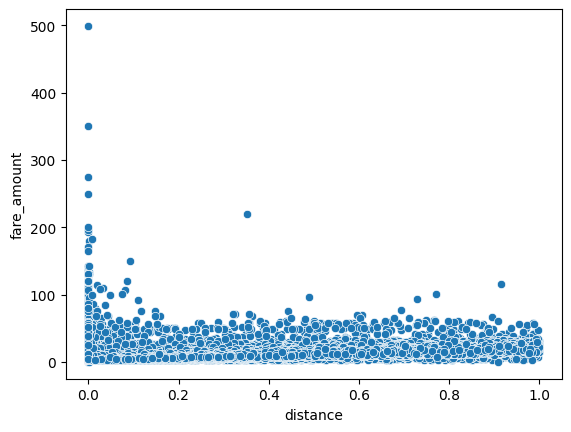

In [130]:
sns.scatterplot(df, x="distance", y="fare_amount")

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

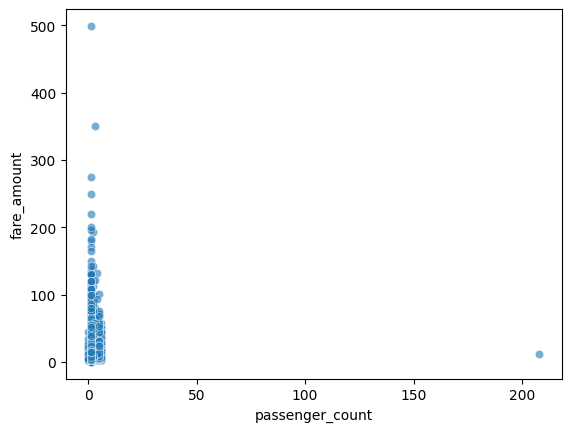

In [131]:
sns.scatterplot(data=df, x="passenger_count", y="fare_amount", alpha=0.6)

In [132]:
remove_outliers("passenger_count")

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

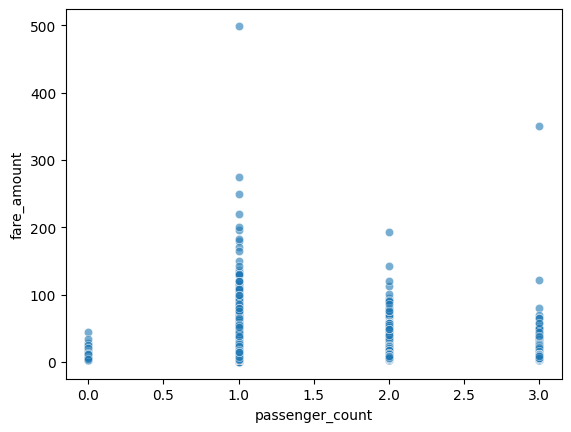

In [133]:
sns.scatterplot(data=df, x="passenger_count", y="fare_amount", alpha=0.6)

In [134]:
df['hour'] = df['pickup_datetime'].dt.hour

In [135]:
df.drop(['pickup_datetime'], axis=1, inplace=True)

<Axes: xlabel='hour', ylabel='fare_amount'>

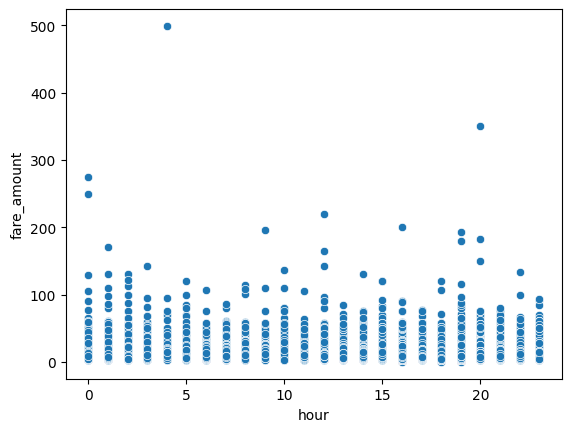

In [136]:
sns.scatterplot(df, x="hour", y="fare_amount")

In [137]:
remove_outliers("fare_amount")

<Axes: xlabel='hour', ylabel='fare_amount'>

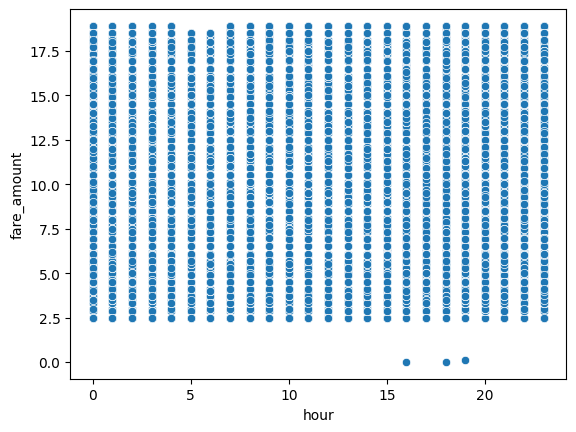

In [138]:
sns.scatterplot(df, x="hour", y="fare_amount")

In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
y_pred = model.predict(X_test)

In [143]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

R2 score:  0.6103793599850218
RMSE:  2.2398069236851583
MAE:  1.6382218056720366


In [144]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [145]:
y_pred = model.predict(X_test)

In [146]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

R2 score:  0.6581188496826244
RMSE:  2.0981048291326863
MAE:  1.5308388373852482
